## House Price Prediction Using Multiple Linear Regression Model

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\WELCOME\Downloads\Housing.csv\Housing.csv")

### Data Understanding

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.shape

(545, 13)

In [6]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data Cleaning

In [9]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
data.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Data Preprocessing

In [11]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in binary_columns:
    data[i] = data[i].map({'yes':1, 'no':0})

In [12]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [13]:
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [14]:
data = data.astype(int)

In [15]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Data Splitting

In [16]:
x = data.loc[:, ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data[['price']]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x_train.shape

(436, 5)

In [19]:
x_test.shape

(109, 5)

### Model selection & Fitting the data into Model

In [20]:
model = LinearRegression()
model

LinearRegression()

In [21]:
model.fit(x_train, y_train)

LinearRegression()

### Predition

In [22]:
y_predict = model.predict(x_test)
y_predict

array([[6178627.50326817],
       [6370140.85865473],
       [3283148.1570249 ],
       [4226007.94816032],
       [3409685.55116741],
       [4262158.3499693 ],
       [5493440.53152357],
       [5559897.74293016],
       [3373715.42245305],
       [3020513.18649699],
       [9519985.01490602],
       [3250408.25967961],
       [3184310.73107686],
       [3639160.7315938 ],
       [3907874.98339005],
       [6174323.64572264],
       [3148160.32926787],
       [4872535.73454622],
       [4826205.69113307],
       [3888527.39095668],
       [5222386.81260559],
       [4294589.38035851],
       [3162381.17719464],
       [4193028.43115341],
       [5747707.28367817],
       [7619041.42465273],
       [2989724.54874164],
       [4794005.74968623],
       [7434038.64867549],
       [3457027.28535551],
       [5102872.70577387],
       [3982998.90101381],
       [6215707.38061091],
       [4724828.08224186],
       [4307759.63367012],
       [5625853.70972471],
       [4791990.70630181],
 

### Model Evaluation

In [23]:
print('R2 Score :',r2_score(y_test, y_predict))
print('Mean Squared Error :',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_predict))

R2 Score : 0.5464062355495873
Mean Squared Error : 2292721545725.3613
Mean Absolute Error : 1127483.3523235186


In [24]:
model.predict([[7000, 2, 3, 2, 1]])

array([[7401619.36740673]])

### Exploratory Data Analysis

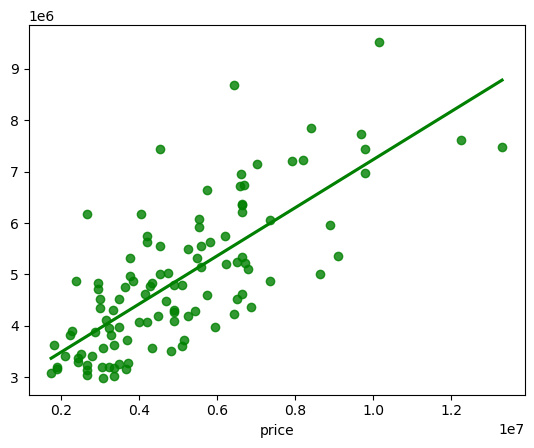

In [25]:
Regression_plot = sns.regplot(x=y_test, y=y_predict, ci=None, color='g')

### Plot of Actual value vs Fitted value

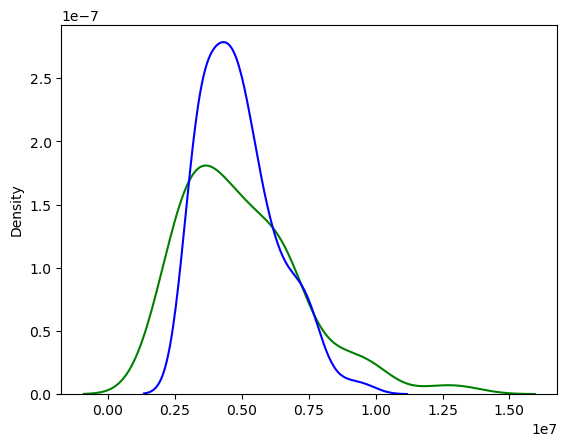

In [26]:
axis_1 = sns.distplot(y_test, hist=False, color='g', label='Actual Value')
axis_2 = sns.distplot(y_predict, hist=False, color='b', label='Fitted Value')

### Saving & Loading the model

In [27]:
import joblib

In [28]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [29]:
loaded_model = joblib.load('model.pkl')